In [ ]:
# Installation
!pip install pandas==2.1.4
!pip install scikit-learn==1.6.0

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:

df = pd.read_csv('C:/Users/Steve/DEEPTECH MAY/Training.csv')
df11= pd.read_csv('C:/Users/Steve/DEEPTECH MAY/Training.csv')

df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [4]:
df.drop(columns=['Unnamed: 133'],inplace=True)

In [5]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
df.info()
df.columns
df['prognosis'].unique()
df['prognosis'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


41

In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le= LabelEncoder()

In [9]:
# Apply Label Encoding to each categorical column
# WE APPLY THE LABEL ENCODING TO THE PROGNOSIS COLUMN CONTAINING 41 UNIQUE DISEASES
df["prognosis"] = le.fit_transform(df["prognosis"])


In [10]:
df.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,35
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,27


## SPLITING OF TRAINING DATA BY ISOLATIONG THE TARGET COLUMN

In [11]:
# Split data into features (X) and target (y)
X = df.drop(columns=["prognosis"])
y = df["prognosis"]

In [12]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [13]:
y

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int64

# IMPORTING THE TEST DATASET

In [14]:
df2 = pd.read_csv('C:/Users/Steve/DEEPTECH MAY/Testing.csv')

In [15]:
df2.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [16]:
df2.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [18]:
df2['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [19]:
df2.info()
df2.columns

df2['prognosis'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


41

In [22]:
df.info()
df.columns

df['prognosis'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(133)
memory usage: 5.0 MB


41

In [23]:
df2['prognosis']

0                            Fungal infection
1                                     Allergy
2                                        GERD
3                         Chronic cholestasis
4                               Drug Reaction
5                         Peptic ulcer diseae
6                                        AIDS
7                                   Diabetes 
8                             Gastroenteritis
9                            Bronchial Asthma
10                              Hypertension 
11                                   Migraine
12                       Cervical spondylosis
13               Paralysis (brain hemorrhage)
14                                   Jaundice
15                                    Malaria
16                                Chicken pox
17                                     Dengue
18                                    Typhoid
19                                hepatitis A
20                                Hepatitis B
21                                

## FOR THE TESTING DATASET, THERE ARE 41 DISEASES ON THE PROGNOSIS COLUMN

##NEXT WE APPLYY LABEL ENCODER CLASS ON THE PROGNOSIS FOR HANDLING THE NON NUMERICAL VALUES

In [25]:
# Apply Label Encoding to each categorical column
# WE APPLY THE LABEL ENCODING TO THE PROGNOSIS COLUMN CONTAINING 41 UNIQUE DISEASES
df2["prognosis"] = le.fit_transform(df2["prognosis"])


In [26]:
df.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,35
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,27


In [27]:
### WE THEN SPLIT THE TEST DATA BY REMOVING THE TARGET COLUMN AND ASSIGNING IT TO ANOTHER VARIABLE
### PREPARING THE DATA FOR PREDICTION

# Split data into features (X) and target (y)
XT = df2.drop(columns=["prognosis"])
yT = df2["prognosis"]


## MODEL BUILDING AND TRAINING

In [28]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [ ]:
### SCALING THE DATA
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### FITTING A RANDOM FOREST MODEL

In [29]:
# Initialize and train a Random Forest classifier WITHOUT SCALING
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### MAKING PREDICTION

In [30]:
# Make predictions on the test set
y_pred = rf.predict(XT)


### EVALUATING PERFORMANCE

In [31]:
# Evaluate the model
accuracy = accuracy_score(yT, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(yT, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(yT, y_pred))


Accuracy: 0.9761904761904762
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      0.50      0.67         2
          16       1.00      

## GRADIENT BOOSTING CLASSIFIER

In [32]:
gb=GradientBoostingClassifier(n_estimators=1000,random_state=42)
gb.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [33]:
### CARRYING OUT PREDICTION
y_predXG = gb.predict(XT)

In [35]:
# Evaluate the model
accuracy = accuracy_score(yT, y_predXG)
print("Accuracy of XGBOOST:", accuracy)
print("Classification Report OF XGBOOST:")
print(classification_report(yT, y_predXG))
print("Confusion Matrix of XGBOOST:")
print(confusion_matrix(yT, y_predXG))

Accuracy of XGBOOST: 0.9761904761904762
Classification Report OF XGBOOST:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      0.50      0.67         2
       

## SUPPORT VECTOR MACHINE CLASSIFIER

In [37]:
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import make_pipeline
from  sklearn.metrics import classification_report,precision_score,recall_score,roc_auc_score
from sklearn.metrics import roc_auc_score

In [38]:
##CREATING AN SVM PIPELINE
svm_pipeline1=make_pipeline(StandardScaler(),SVC(kernel='rbf', C=1.0,gamma='scale',probability=True,decision_function_shape='ovr'))
svm_pipeline1.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [40]:
### CARRYING OUT PREDICTION
y_predSVM = svm_pipeline1.predict(XT)
#predicting probabilities for ROC AUC
#y_predSVM2 = svm_pipeline1.predict_proba(X_test_scaled)

In [41]:
# Evaluate the model
accuracy = accuracy_score(yT, y_predSVM)
print("Accuracy of SVM:", accuracy)
print("Classification Report OF SVM:")
print(classification_report(yT, y_predSVM))
print("Confusion Matrix of SVM:")
print(confusion_matrix(yT, y_predSVM))

Accuracy of SVM: 0.9761904761904762
Classification Report OF SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      0.50      0.67         2
          16   

## VISUALIZATION OF SOME DATA VALUES

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [43]:
# Set up Seaborn theme
sns.set(style="whitegrid")

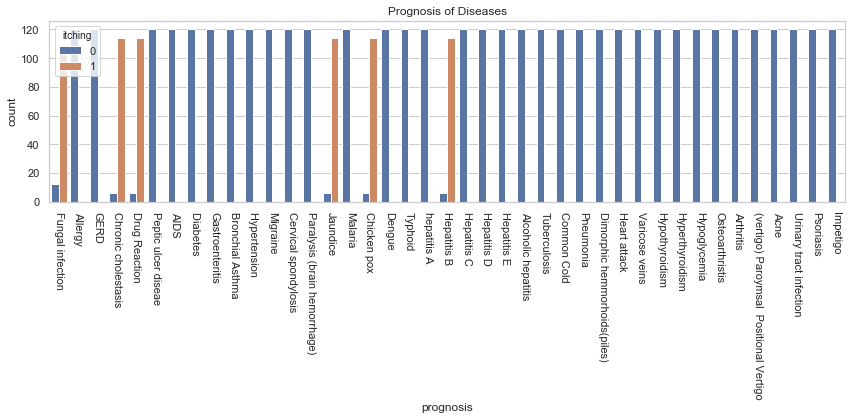

In [53]:
# Count Plot: Outcome Status by Country
plt.figure(figsize=(12, 6))
sns.countplot(data=df11, x='prognosis', hue='itching')
plt.title("Prognosis of Diseases")
plt.xticks(rotation=270)
plt.tight_layout()
plt.show()

In [54]:
df11['prognosis'].value_counts()

Hypothyroidism                             120
Diabetes                                   120
AIDS                                       120
Dimorphic hemmorhoids(piles)               120
Tuberculosis                               120
hepatitis A                                120
Chicken pox                                120
Allergy                                    120
Typhoid                                    120
Hepatitis E                                120
Cervical spondylosis                       120
Urinary tract infection                    120
Chronic cholestasis                        120
Drug Reaction                              120
Hypertension                               120
Hypoglycemia                               120
Jaundice                                   120
Common Cold                                120
(vertigo) Paroymsal  Positional Vertigo    120
Psoriasis                                  120
Fungal infection                           120
Heart attack 

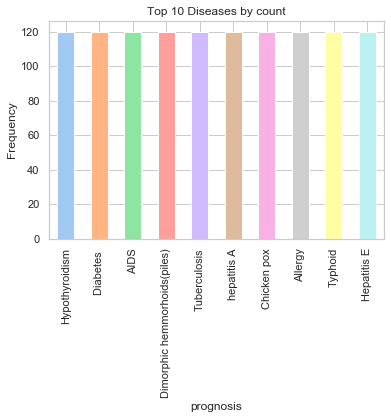

In [50]:
# Top 10 values in a column
top_10_values = df11['prognosis'].value_counts().head(10)

# Bar Chart of Top 10 values
top_10_values.plot(kind='bar',color=sns.color_palette("pastel"))
plt.title('Top 10 Diseases by count')

plt.xlabel('prognosis')

plt.ylabel('Frequency')
plt.show()


## Classification